In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lpf
from integral import integral

In [2]:
df = pd.read_csv('memdata_TSND121-14021886_2018-09-20_120110.667.csv', header=None,
                 names=['item', 't', 'acc_x', 'acc_y', 'acc_z', 'omega_x', 'omega_y', 'omega_z'])

In [3]:
df.head()

item         t  acc_x  acc_y  acc_z  omega_x  omega_y  omega_z
0  ags  43270781   9605   -209   1257       -6      -29       61
1  ags  43270782   9639   -167   1269       -6      -17       79
2  ags  43270783   9651   -121   1311        6      -23       85
3  ags  43270784   9678   -155   1316       -6      -29       85
4  ags  43270785   9670   -172   1252       -6      -47       79

In [4]:
y = np.array(df['omega_y'])/100

In [5]:
zeta = lpf.lpfilter(y, 20)

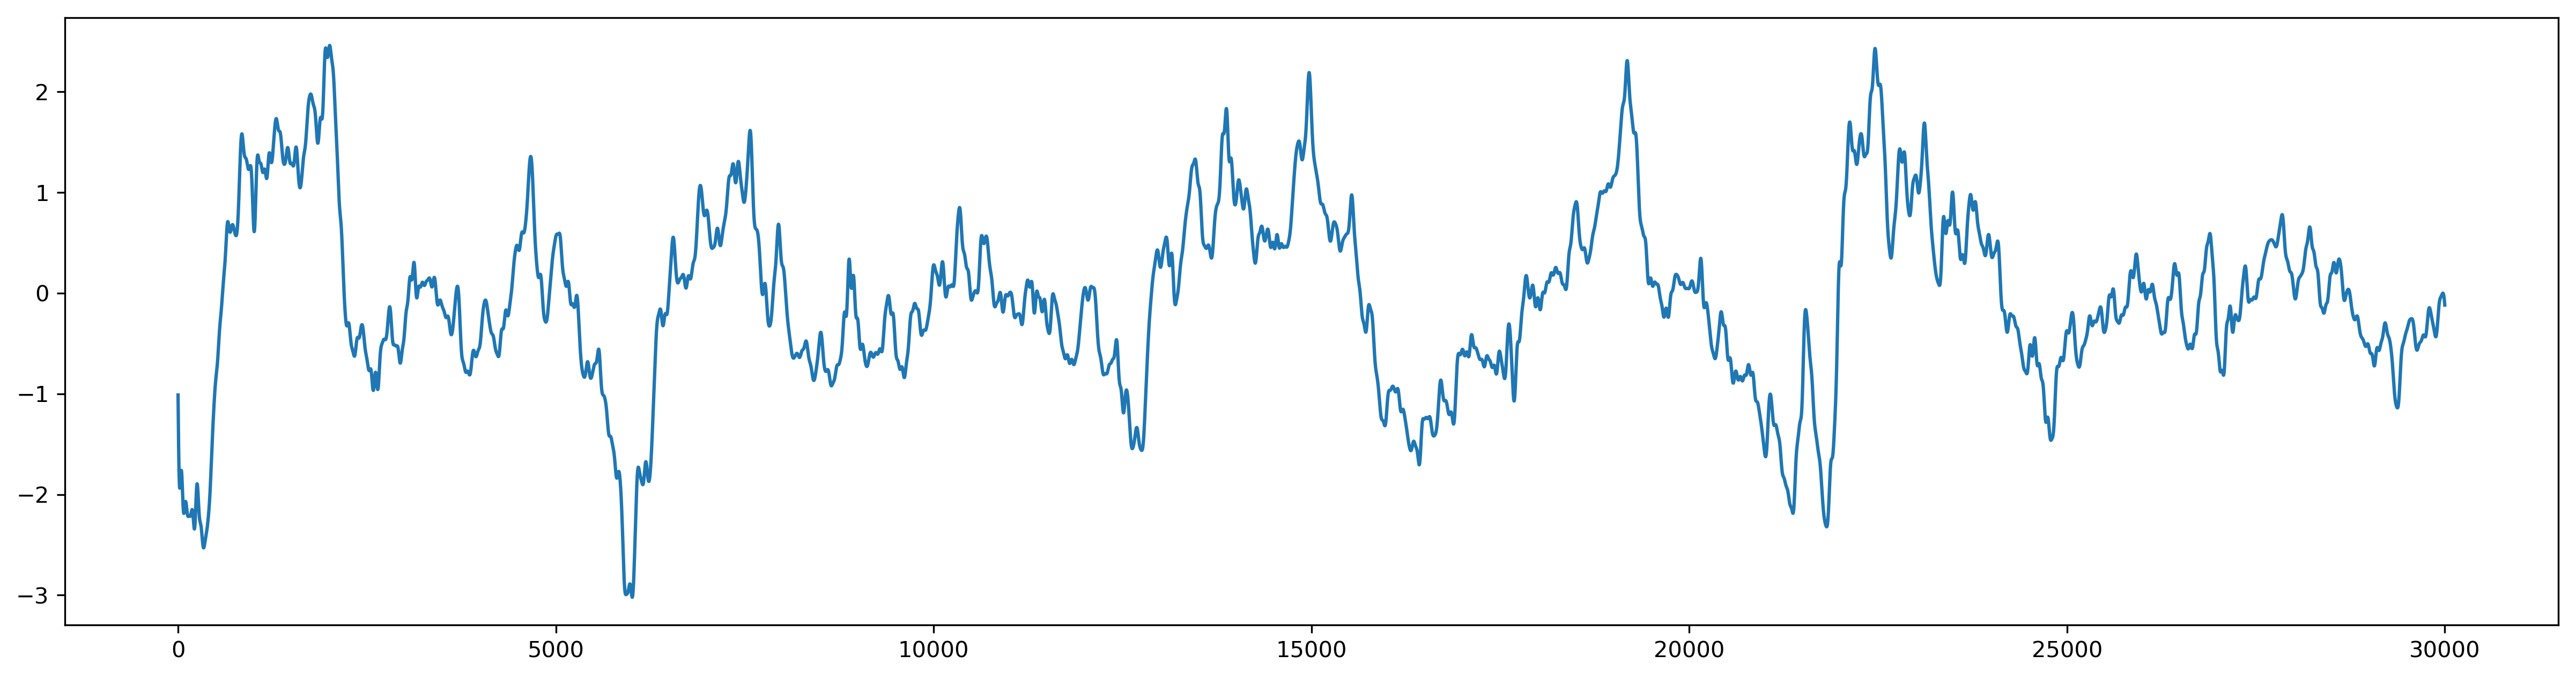

In [6]:
plt.figure(figsize=(20,5), dpi=300)
plt.plot(zeta[:30000])

In [7]:
theta = integral(zeta, 0, 0, 30000)
#mu = np.mean(theta)
#theta = theta - mu

Text(0, 0.5, 'anle[deg]')

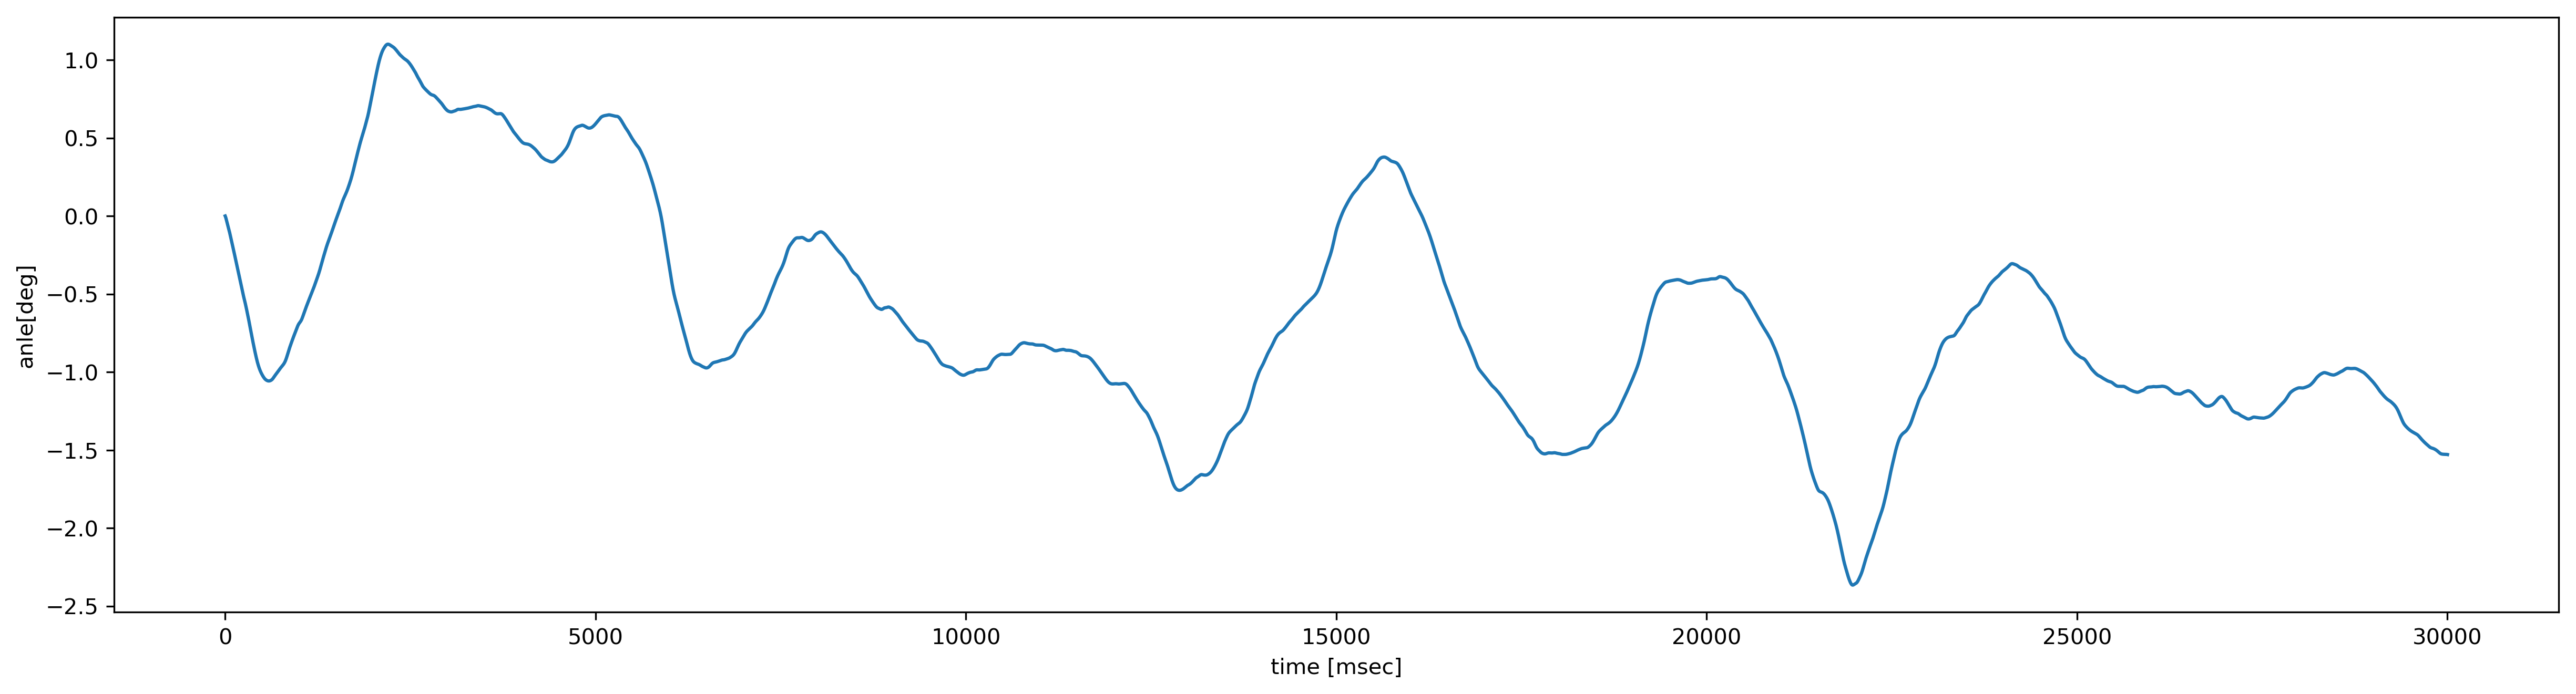

In [8]:
plt.figure(figsize=(20,5), dpi=300)
plt.plot(theta)
plt.xlabel('time [msec]')
plt.ylabel('anle[deg]')

Text(0, 0.5, 'anglar velocity[deg/sec]')

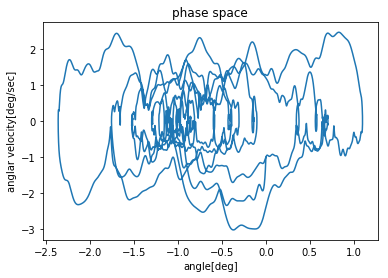

In [10]:
plt.plot(theta[0:30000], zeta[0:30000])
plt.title('phase space')
plt.xlabel('angle[deg]')
plt.ylabel('anglar velocity[deg/sec]')

In [11]:
import matplotlib.animation as anim
%matplotlib nbagg

<IPython.core.display.Javascript object>


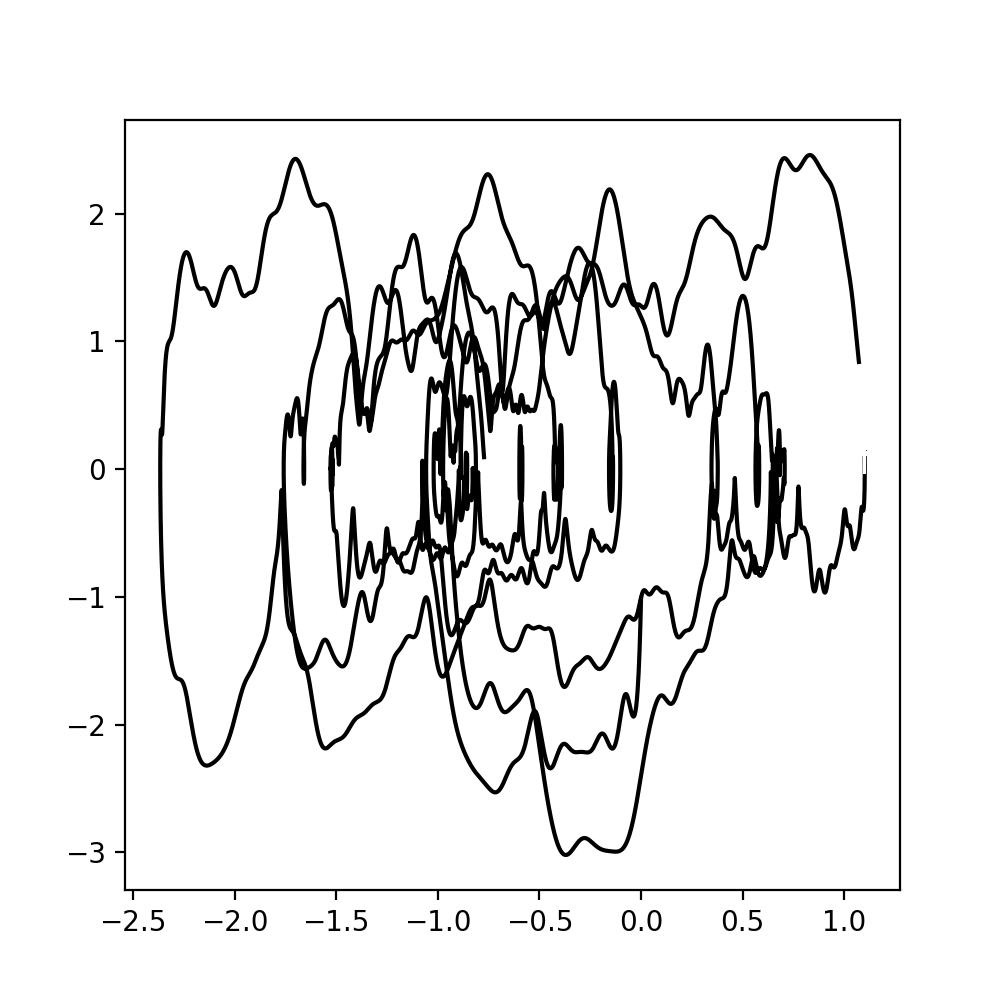

In [12]:
fig = plt.figure(figsize=(5,5))
ims = []
for i in range(0, 30000, 20):
    im = plt.plot(theta[0:i], zeta[0:i], "black")
    #plt.yli
    ims.append(im)
ani = anim.ArtistAnimation(fig, ims, interval=10)
plt.show()